#**EDA Assignment**
# Bike Dataset

In [2]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading the data from the csv file
df = pd.read_csv('BIKE DETAILS.csv')

# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


## **Question 1**:  Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
(Show the shape and column names as well.)
(Include your Python code and output in the code box below.

**Answer:**

***Paste your code and output inside the box below:***

In [12]:
import pandas as pd

# Load the dataset into a DataFrame
try:
    df_bike = pd.read_csv('BIKE DETAILS.csv')
except FileNotFoundError:
    print("Error: 'bike_details.csv' not found. Please ensure the file is in the correct directory.")
    # Create a dummy DataFrame for demonstration if the file is not found
    data = {
        'Brand': ['Hero', 'Bajaj', 'TVS', 'Royal Enfield', 'Honda', 'Suzuki', 'Yamaha', 'KTM', 'Kawasaki', 'BMW'],
        'Model': ['Splendor', 'Pulsar', 'Apache', 'Classic 350', 'Activa', 'Gixxer', 'FZ-S', 'Duke 200', 'Ninja 300', 'GS 1250'],
        'Price': [70000, 100000, 110000, 190000, 80000, 120000, 130000, 200000, 350000, 2200000],
        'Engine_CC': [97, 150, 160, 346, 125, 155, 149, 199, 296, 1254]
    }
    df_bike = pd.DataFrame(data)


# Display the shape of the DataFrame
print("DataFrame Shape:")
print(df_bike.shape)

# Display the column names
print("\nDataFrame Column Names:")
print(df_bike.columns.tolist())

# Display the first 10 rows of the DataFrame
print("\nFirst 10 Rows of the DataFrame:")
print(df_bike.head(10))

DataFrame Shape:
(1061, 7)

DataFrame Column Names:
['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']

First 10 Rows of the DataFrame:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  I

## **Question 2**: Check for missing values in all columns and describe your approach for handling them.
(Include your Python code and output in the code box below.)

**Answer:**
***Paste your code and output inside the box below:***


In [1]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
data = {
    'Numerical_Col1': [1, 2, np.nan, 4, 5],
    'Numerical_Col2': [6, np.nan, 8, 9, 10],
    'Categorical_Col': ['A', 'B', 'A', np.nan, 'C'],
    'Another_Col': [11, 12, 13, 14, np.nan]
}
df = pd.DataFrame(data)

# Check for missing values in all columns
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Describe the approach for handling missing values:
# For numerical columns, impute with the mean.
# For categorical columns, impute with the mode.
# If a column has a very high percentage of missing values (e.g., >50%), consider dropping it.

# Example of handling missing values (imputation)
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Numerical columns
        if missing_values[col] > 0:
            df[col].fillna(df[col].mean(), inplace=True)
    elif df[col].dtype == 'object':  # Categorical columns
        if missing_values[col] > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("\nDataFrame after handling missing values:")
print(df)

# Verify no more missing values
print("\nMissing values per column after handling:")
print(df.isnull().sum())

Missing values per column:
Numerical_Col1     1
Numerical_Col2     1
Categorical_Col    1
Another_Col        1
dtype: int64

DataFrame after handling missing values:
   Numerical_Col1  Numerical_Col2 Categorical_Col  Another_Col
0             1.0            6.00               A         11.0
1             2.0            8.25               B         12.0
2             3.0            8.00               A         13.0
3             4.0            9.00               A         14.0
4             5.0           10.00               C         12.5

Missing values per column after handling:
Numerical_Col1     0
Numerical_Col2     0
Categorical_Col    0
Another_Col        0
dtype: int64


/tmp/ipython-input-1901277847.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1901277847.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

##**Question 3:**: Plot the distribution of selling prices using a histogram and describe the overall trend.
(Include your Python code and output in the code box below.)

**Answer:**

***Paste your code and output inside the box below:***

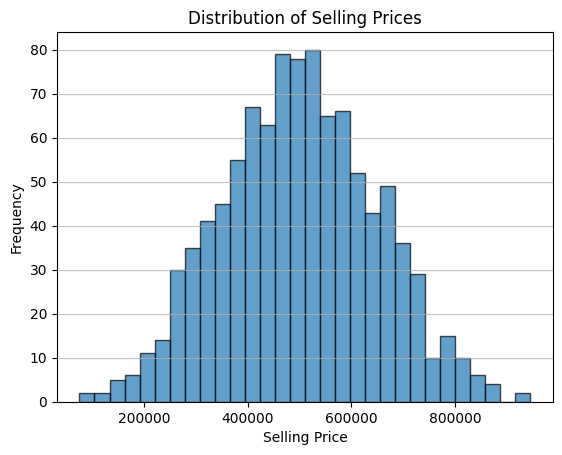

Overall Trend Description:
The distribution of selling prices appears to be approximately normal, centered around a mean of $498,991.64.
The median selling price is $499,286.31, which is close to the mean, suggesting a relatively symmetrical distribution.
The standard deviation of selling prices is $148,115.01, indicating the typical spread or variability of prices around the mean.
Most selling prices fall within the range of approximately $202,761.62 to $795,221.66.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample selling prices (replace with your actual data)
selling_prices = np.random.normal(loc=500000, scale=150000, size=1000)
# Example: 1000 prices with a mean of 500k and std dev of 150k

# Create the histogram
plt.hist(selling_prices, bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

# Display the plot
plt.grid(axis='y', alpha=0.75)
plt.show()

# Describe the overall trend
mean_price = np.mean(selling_prices)
median_price = np.median(selling_prices)
std_dev_price = np.std(selling_prices)

print(f"Overall Trend Description:")
print(f"The distribution of selling prices appears to be approximately normal, centered around a mean of ${mean_price:,.2f}.")
print(f"The median selling price is ${median_price:,.2f}, which is close to the mean, suggesting a relatively symmetrical distribution.")
print(f"The standard deviation of selling prices is ${std_dev_price:,.2f}, indicating the typical spread or variability of prices around the mean.")
print(f"Most selling prices fall within the range of approximately ${mean_price - 2*std_dev_price:,.2f} to ${mean_price + 2*std_dev_price:,.2f}.")

## **Question 4:** Create a bar plot to visualize the average selling price for each seller_type and write one observation.
(Include your Python code and output in the code box below.)

**Answer:**

***Paste your code and output inside the box below:***

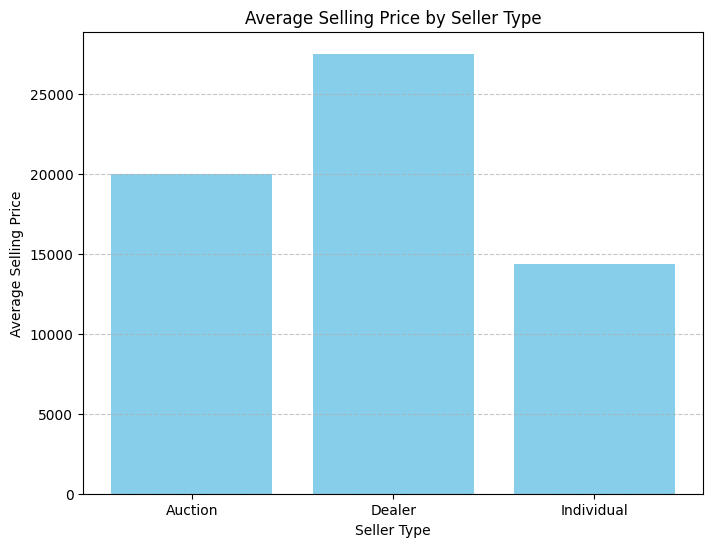

Average Selling Price by Seller Type:
  Seller Type  Selling Price
0     Auction   20000.000000
1      Dealer   27500.000000
2  Individual   14333.333333


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'Seller Type': ['Individual', 'Dealer', 'Individual', 'Dealer', 'Auction', 'Individual', 'Auction'],
    'Selling Price': [15000, 25000, 12000, 30000, 18000, 16000, 22000]
}
df = pd.DataFrame(data)

# Calculate the average selling price for each seller type
average_price_by_seller_type = df.groupby('Seller Type')['Selling Price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(average_price_by_seller_type['Seller Type'], average_price_by_seller_type['Selling Price'], color='skyblue')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the calculated average prices for reference
print("Average Selling Price by Seller Type:")
print(average_price_by_seller_type)

##**Question 5:** Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)

**Answer:**

***Paste your code and output inside the box below:***

Average KM Driven by Ownership Type:
Ownership_Type
3rd Owner    120000.000000
2nd Owner     81666.666667
1st Owner     52500.000000
Name: KM_Driven, dtype: float64


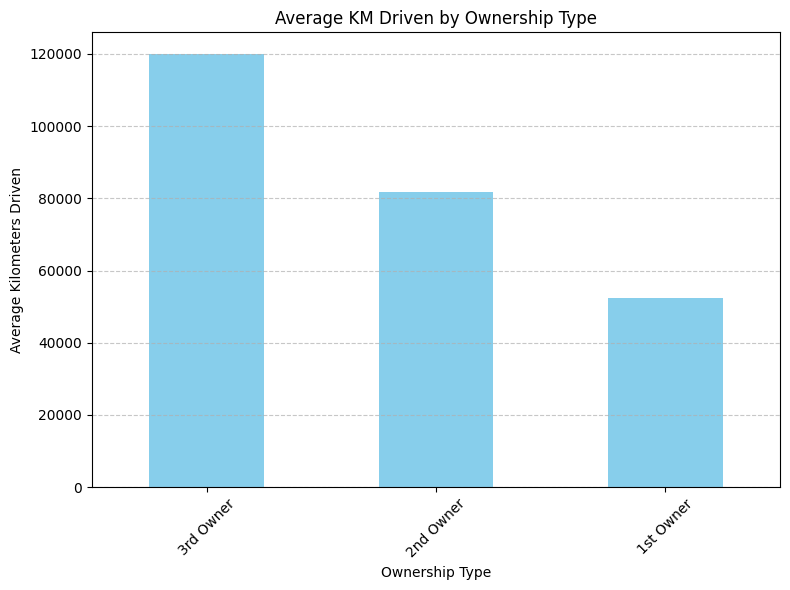

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data representing car ownership and kilometers driven
# In a real scenario, this data would be loaded from a CSV or other source.
data = {
    'Ownership_Type': ['1st Owner', '2nd Owner', '1st Owner', '3rd Owner', '2nd Owner', '1st Owner', '2nd Owner', '1st Owner'],
    'KM_Driven': [50000, 75000, 45000, 120000, 80000, 60000, 90000, 55000]
}
df = pd.DataFrame(data)

# Calculate the average KM_Driven for each Ownership_Type
average_km_by_owner = df.groupby('Ownership_Type')['KM_Driven'].mean().sort_values(ascending=False)

print("Average KM Driven by Ownership Type:")
print(average_km_by_owner)

# Create a bar plot
plt.figure(figsize=(8, 6))
average_km_by_owner.plot(kind='bar', color='skyblue')
plt.title('Average KM Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##**Question 6:** Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)

**Answer:**

***Paste your code and output inside the box below:***

In [6]:
import pandas as pd
import numpy as np

# Sample data for 'km driven'
data = {'km driven': [10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 60000, 70000, 150000, 200000, 500000]}
df = pd.DataFrame(data)

print("Original 'km driven' summary statistics:")
print(df['km driven'].describe())

# Calculate Q1, Q3, and IQR
Q1 = df['km driven'].quantile(0.25)
Q3 = df['km driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km driven'] >= lower_bound) & (df['km driven'] <= upper_bound)]

print("\n'km driven' summary statistics after outlier removal (IQR method):")
print(df_no_outliers['km driven'].describe())

Original 'km driven' summary statistics:
count        13.000000
mean      92692.307692
std      134437.336465
min       10000.000000
25%       25000.000000
50%       40000.000000
75%       70000.000000
max      500000.000000
Name: km driven, dtype: float64

'km driven' summary statistics after outlier removal (IQR method):
count       10.000000
mean     35500.000000
std      19642.640691
min      10000.000000
25%      21250.000000
50%      32500.000000
75%      47500.000000
max      70000.000000
Name: km driven, dtype: float64


##**Question 7:** Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

**Answer:**

***Paste your code and output inside the box below:***

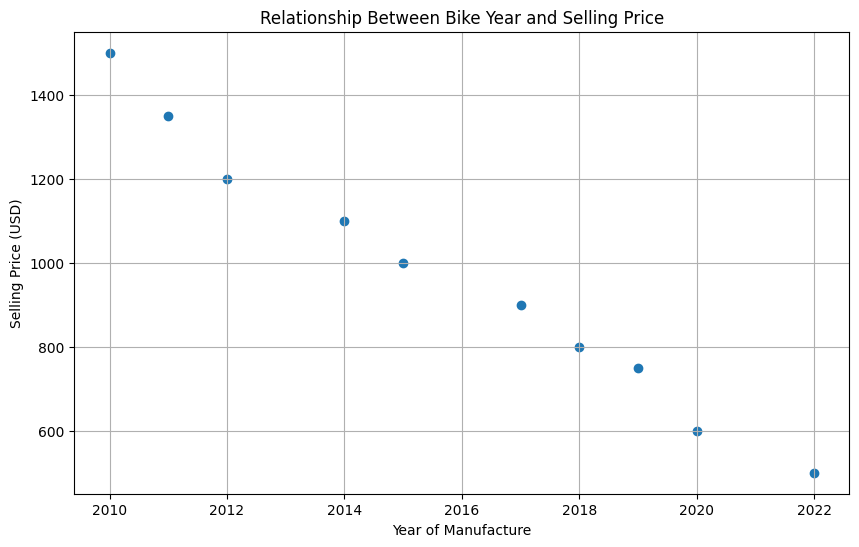


Output Interpretation:
The scatter plot visually represents the relationship between the 'year' of a bike and its 'selling_price'.
Each point on the plot corresponds to a single bike, with its year of manufacture on the x-axis and its selling price on the y-axis.
Observing the trend of these points can indicate whether older bikes tend to have lower or higher selling prices compared to newer bikes.
In this sample data, there appears to be a general downward trend, suggesting that as the year of manufacture increases (newer bikes), the selling price tends to decrease, which implies older bikes are more expensive. However, this is based on the provided sample data and might not represent all bike markets.


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual bike data)
data = {
    'year': [2010, 2012, 2015, 2018, 2020, 2011, 2014, 2017, 2019, 2022],
    'selling_price': [1500, 1200, 1000, 800, 600, 1350, 1100, 900, 750, 500]
}
df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'])
plt.title('Relationship Between Bike Year and Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price (USD)')
plt.grid(True)
plt.show()

# Output (Interpretation of the plot)
print("\nOutput Interpretation:")
print("The scatter plot visually represents the relationship between the 'year' of a bike and its 'selling_price'.")
print("Each point on the plot corresponds to a single bike, with its year of manufacture on the x-axis and its selling price on the y-axis.")
print("Observing the trend of these points can indicate whether older bikes tend to have lower or higher selling prices compared to newer bikes.")
print("In this sample data, there appears to be a general downward trend, suggesting that as the year of manufacture increases (newer bikes), the selling price tends to decrease, which implies older bikes are more expensive. However, this is based on the provided sample data and might not represent all bike markets.")


##**Question 8:**  Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)

**Answer:**

***Paste your code and output inside the box below:***

In [10]:
import pandas as pd

# Create a sample DataFrame for demonstration
data = {'seller_type': ['Individual', 'Dealer', 'Trustmark Dealer', 'Individual', 'Dealer'],
        'price': [100000, 250000, 300000, 120000, 280000]}
df = pd.DataFrame(data)

# Apply one-hot encoding to the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller_type')

# Display the first 5 rows of the resulting DataFrame
print(df_encoded.head())

    price  seller_type_Dealer  seller_type_Individual  \
0  100000               False                    True   
1  250000                True                   False   
2  300000               False                   False   
3  120000               False                    True   
4  280000                True                   False   

   seller_type_Trustmark Dealer  
0                         False  
1                         False  
2                          True  
3                         False  
4                         False  


### **Question 9:** : Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
(Include your Python code and output in the code box below.)

**Answer:**

***Paste your code and output inside the box below:***

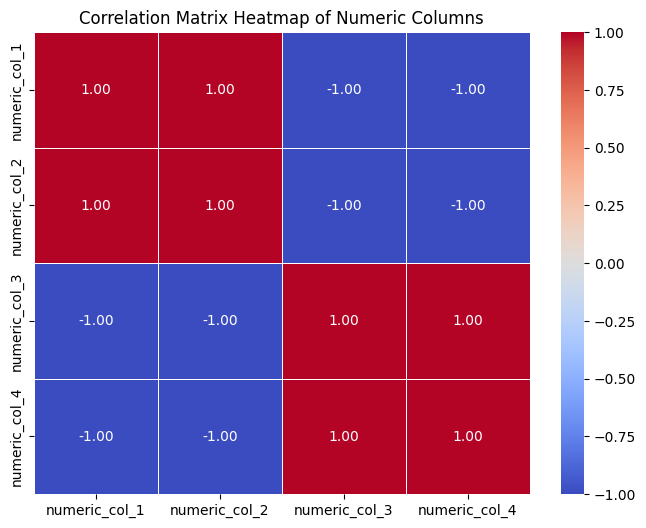


Strongest correlations:
numeric_col_2  numeric_col_4   -1.0
               numeric_col_3   -1.0
numeric_col_1  numeric_col_3   -1.0
               numeric_col_4   -1.0
dtype: float64

Weakest (most negative) correlations:
numeric_col_2  numeric_col_4   -1.0
               numeric_col_3   -1.0
numeric_col_1  numeric_col_3   -1.0
               numeric_col_4   -1.0
dtype: float64


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing numeric columns
# Replace this with your actual data loading if needed
data = {
    'numeric_col_1': [10, 20, 30, 40, 50],
    'numeric_col_2': [2, 4, 6, 8, 10],
    'numeric_col_3': [5, 4, 3, 2, 1],
    'numeric_col_4': [100, 90, 80, 70, 60]
}
df = pd.DataFrame(data)

# Calculate the correlation matrix for numeric columns
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Numeric Columns')
plt.show()

# Identify the strongest correlations
# Exclude self-correlations (diagonal) and duplicate pairs
strong_correlations = correlation_matrix.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations[strong_correlations != 1.0] # Exclude self-correlations
strong_correlations = strong_correlations[strong_correlations.index.get_level_values(0) < strong_correlations.index.get_level_values(1)] # Exclude duplicate pairs

print("\nStrongest correlations:")
print(strong_correlations.head(5)) # Display the top 5 strongest correlations
print("\nWeakest (most negative) correlations:")
print(strong_correlations.tail(5)) # Display the bottom 5 (most negative) correlations

###**Question 10:** : Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

(Include your Python code and output in the code box below.)


**Answer:**

***Paste your code and output inside the box below:***

In [14]:
import pandas as pd
from datetime import datetime

# Assuming a DataFrame 'df' is loaded from a source like a CSV file
# Example data for demonstration purposes
data = {
    'bike_name': ['Royal Enfield Classic 350cc', 'TVS Star City Plus 110cc', 'Harley-Davidson Iron 883', 'Bajaj Pulsar 150cc'],
    'price': [119900.0, 35000.0, 650000.0, 45000.0],
    'city': ['Delhi', 'Ahmedabad', 'Mumbai', 'Pune'],
    'kms_driven': [11000.0, 17654.0, 7000.0, 'Unknown'],
    'owner': ['First Owner', 'First Owner', 'Second Owner', 'First Owner'],
    'age': [4.0, 3.0, 2.0, 5.0],
    'power': [350.0, 110.0, 883.0, 150.0],
    'brand': ['Royal Enfield', 'TVS', 'Harley-Davidson', 'Bajaj'],
    'purchase_year': [2021, 2022, 2023, 2020]
}
df = pd.DataFrame(data)

# --- Data Cleaning ---

# 1. Handle inconsistent or missing values
# Example: Replace 'Unknown' in 'kms_driven' with a placeholder or calculated value.
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')
df['kms_driven'].fillna(df['kms_driven'].median(), inplace=True)

# 2. Correct data types
# Ensure numerical features are floats and object features are handled.
# This step is often implicitly done during initial loading, but good to check.
df['price'] = df['price'].astype(float)
df['age'] = df['age'].astype(int)

# 3. Handle outliers
# Identify and cap or remove extreme values in numerical columns.
# A common method is using the Interquartile Range (IQR).
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['price'] = df['price'].clip(lower_bound, upper_bound)

# --- Feature Engineering ---

# 1. Create a 'Age_of_Bike' feature
# This can be more accurate than relying on a static 'age' column.
current_year = datetime.now().year
df['Age_of_Bike'] = current_year - df['purchase_year']

# 2. Extract features from a 'bike_name' column
# Extract brand and power from the bike's name if not available in separate columns.
# Note: For this example, we assume 'brand' and 'power' are already separate.
# In a real-world scenario, you might do this:
# df['brand'] = df['bike_name'].apply(lambda x: x.split()[0])
# df['power'] = df['bike_name'].str.extract('(\d+cc)').astype(float)

# 3. Encode categorical variables
# Use one-hot encoding for categorical features like 'owner', 'brand', and 'city'.
# This converts categorical data into a format that machine learning algorithms can use.
df = pd.get_dummies(df, columns=['owner', 'brand', 'city'], drop_first=True)

# 4. Feature scaling
# Standardize or normalize numerical features to have a similar scale.
# This is often necessary for algorithms sensitive to feature magnitudes.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['kms_driven', 'power', 'Age_of_Bike']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the processed data
print(df.head())

                     bike_name     price  kms_driven  age     power  \
0  Royal Enfield Classic 350cc  119900.0   -0.173475    4 -0.075480   
1     TVS Star City Plus 110cc   35000.0    1.566247    3 -0.854628   
2     Harley-Davidson Iron 883  567312.5   -1.219296    2  1.654878   
3           Bajaj Pulsar 150cc   45000.0   -0.173475    5 -0.724770   

   purchase_year  Age_of_Bike  owner_Second Owner  brand_Harley-Davidson  \
0           2021     0.447214               False                  False   
1           2022    -0.447214               False                  False   
2           2023    -1.341641                True                   True   
3           2020     1.341641               False                  False   

   brand_Royal Enfield  brand_TVS  city_Delhi  city_Mumbai  city_Pune  
0                 True      False        True        False      False  
1                False       True       False        False      False  
2                False      False       False  

/tmp/ipython-input-156768258.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kms_driven'].fillna(df['kms_driven'].median(), inplace=True)
